In [1]:
from utils.analysis.tools import simDir, periodicity_plot
from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
from tqdm import tqdm
from utils import plot
from utils.plot import _FIGURE_DIR, get_size_inches, _CM
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [2]:
times = []
coms = []
for val in [3000, 5000, 10000, 20000]:
    sim = simDir(f"/nfs/arupclab001/davidgoh/CoupledEPCondensates/workspace/05_TimeDelay/20240812_LowDegradationNormalInteractionLowAccuracy/M1_1.0_b_-0.25_g_-0.1_c_0.08_k_0.05_kp_0.0137791_c1_3.53_sw_1.0_sr_2.5_cn_5.5_l_10_M3_0.1_kt_0.0_rl_0.0_wd_0.0_t_{val:.1f}_kd_0.04")
    sim.run()
    sim.condensate()
    times.append(sim.time)
    coms.append(sim.com[:,0])

In [3]:
delays = [3000, 5000, 10000, 20000]

In [4]:
cmap = [(0, 114, 178), (230, 159, 0), (0, 158, 115), (204, 121, 167)]
cmap = [(r/255, g/255, b/255) for r,g,b in cmap]

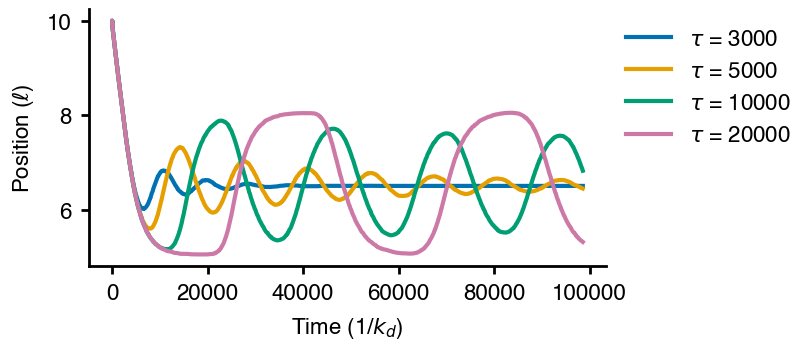

In [6]:
fig, ax = plt.subplots(figsize=(3.34,3.34/2))
for i, (t, com, d) in enumerate(zip(times,coms,delays)):
    ax.plot(t,com,label=r"$\tau$ = "f"{d}", color=cmap[i])
ax.set_xlabel("Time (1/$k_d$)")
ax.set_ylabel("Position ($\ell$)")
ax.legend(bbox_to_anchor=[1,1])
plt.savefig(_FIGURE_DIR/"damped_oscillations.pdf")
plt.savefig(_FIGURE_DIR/"damped_oscillations.png")